In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings(action="ignore")
plt.style.use(["seaborn-bright","dark_background"])

In [2]:
data = pd.read_csv("water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.describe(include="all")

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
for i in data.columns:
    per = data[i].isnull().sum()/data.shape[0]
    print("Feature {} has {}% data missing".format(i,round(per*100,2)))

Feature ph has 14.99% data missing
Feature Hardness has 0.0% data missing
Feature Solids has 0.0% data missing
Feature Chloramines has 0.0% data missing
Feature Sulfate has 23.84% data missing
Feature Conductivity has 0.0% data missing
Feature Organic_carbon has 0.0% data missing
Feature Trihalomethanes has 4.95% data missing
Feature Turbidity has 0.0% data missing
Feature Potability has 0.0% data missing


In [5]:
mean1 = data["ph"].mean()
mean2 = data["Sulfate"].mean()
mean3 = data["Trihalomethanes"].mean()

In [6]:
data["ph"] = data["ph"].fillna(mean1)
data["Sulfate"] = data["Sulfate"].fillna(mean2)
data["Trihalomethanes"] = data["Trihalomethanes"].fillna(mean3)

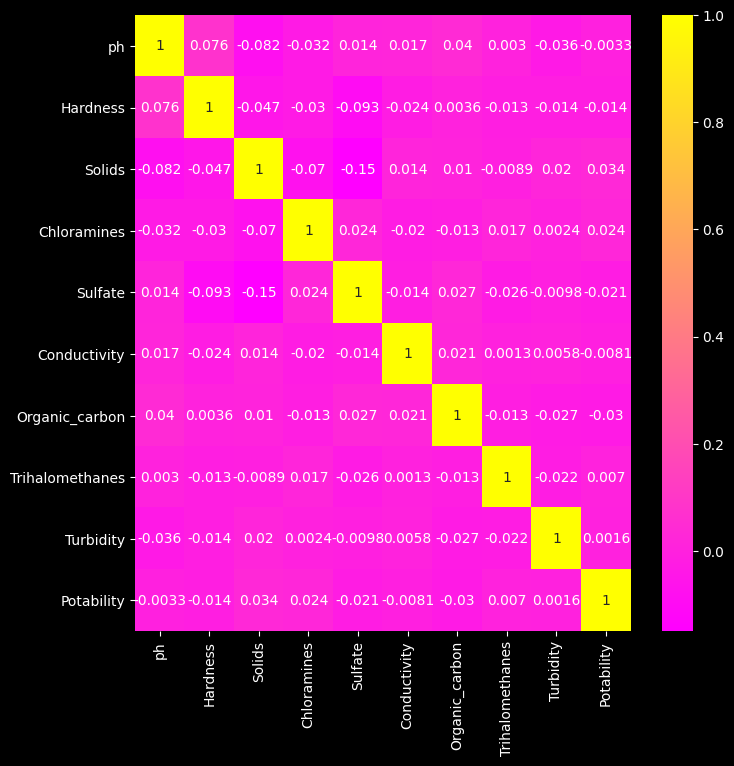

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True, cmap = "spring")
plt.show()

In [8]:
X = data.drop(columns=["Potability"])
y = data["Potability"]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=101)

In [10]:
x_train["Potability"] = y_train

## Balancing Unbalanced Dataset

In [11]:
x_train["Potability"].value_counts()

0    1691
1    1093
Name: Potability, dtype: int64

In [12]:
class_0 = x_train[x_train["Potability"]==0]
class_1 = x_train[x_train["Potability"]==1]

In [13]:
class_1_data = class_1
class_0_data = class_0.sample(n=class_1.shape[0])

In [14]:
x_data = pd.concat([class_1_data,class_0_data])

In [15]:
x_data["Potability"].value_counts()

1    1093
0    1093
Name: Potability, dtype: int64

In [16]:
import sklearn
x_data = sklearn.utils.shuffle(x_data)

In [17]:
x_train = x_data.drop(columns=["Potability"])
y_train = x_data["Potability"]

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
model = LogisticRegression()
model.fit(x_train, y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [21]:
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52      1093
           1       0.51      0.49      0.50      1093

    accuracy                           0.51      2186
   macro avg       0.51      0.51      0.51      2186
weighted avg       0.51      0.51      0.51      2186

              precision    recall  f1-score   support

           0       0.63      0.51      0.56       307
           1       0.38      0.50      0.43       185

    accuracy                           0.51       492
   macro avg       0.51      0.51      0.50       492
weighted avg       0.54      0.51      0.52       492



In [22]:
print(confusion_matrix(y_train,train_pred))
print(confusion_matrix(y_test,test_pred))

[[576 517]
 [558 535]]
[[157 150]
 [ 92  93]]


In [23]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("ET",ExtraTreesClassifier()))
models.append(("GB",GradientBoostingClassifier()))
models.append(("SVC",SVC()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("GNB",GaussianNB()))

In [24]:
for name, model in models:
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(name)
    print(classification_report(y_train,train_pred))
    print(classification_report(y_test,test_pred))
    
    print(confusion_matrix(y_train,train_pred))
    print(confusion_matrix(y_test,test_pred))
    print('')

LR
              precision    recall  f1-score   support

           0       0.51      0.53      0.52      1093
           1       0.51      0.49      0.50      1093

    accuracy                           0.51      2186
   macro avg       0.51      0.51      0.51      2186
weighted avg       0.51      0.51      0.51      2186

              precision    recall  f1-score   support

           0       0.63      0.51      0.56       307
           1       0.38      0.50      0.43       185

    accuracy                           0.51       492
   macro avg       0.51      0.51      0.50       492
weighted avg       0.54      0.51      0.52       492

[[576 517]
 [558 535]]
[[157 150]
 [ 92  93]]

DT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1093
           1       1.00      1.00      1.00      1093

    accuracy                           1.00      2186
   macro avg       1.00      1.00      1.00      2186
weighted avg       1.

## Choosing RandomForest

In [26]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
for i in range(100,1001,50):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(x_train,y_train)
    print("{} = {}".format(i,model.score(x_test,y_test)))

100 = 0.6463414634146342
150 = 0.6483739837398373
200 = 0.6382113821138211
250 = 0.6544715447154471
300 = 0.6565040650406504
350 = 0.6585365853658537
400 = 0.6626016260162602
450 = 0.6747967479674797
500 = 0.6565040650406504
550 = 0.6686991869918699
600 = 0.6626016260162602
650 = 0.6829268292682927
700 = 0.6565040650406504
750 = 0.6483739837398373
800 = 0.6605691056910569
850 = 0.6585365853658537
900 = 0.6544715447154471
950 = 0.6483739837398373
1000 = 0.6646341463414634


In [35]:
for i in range(1,10):
    model = RandomForestClassifier(n_estimators=650,max_features=i)
    model.fit(x_train,y_train)
    print("{} = {}".format(i,model.score(x_test,y_test)))

1 = 0.6483739837398373
2 = 0.6422764227642277
3 = 0.6666666666666666
4 = 0.6565040650406504
5 = 0.676829268292683
6 = 0.6707317073170732
7 = 0.6747967479674797
8 = 0.6504065040650406
9 = 0.6605691056910569


In [36]:
model = RandomForestClassifier(n_estimators=650,max_features=5)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=650)

## Saving model using pickle

In [37]:
import pickle

In [38]:
pickle_out = open("water_potability.pkl","wb")
pickle.dump(model,pickle_out)
loaded_model = pickle.load(open("water_potability.pkl","rb"))
result = loaded_model.score(x_test,y_test)
print(result)

0.6626016260162602
